<a href="https://colab.research.google.com/github/chetna2707/music_dataset/blob/main/music_dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Dataset Exploration (Spotify & YouTube)

## Objective
Explore audio features and popularity metrics from the Spotify and YouTube combined music dataset. Analyze distributions, artist insights, and correlate track characteristics with popularity.

## Table of Contents
1. Imports & Setup  
2. Data Loading & Cleaning  
3. Audio Feature Distributions  
4. Feature Correlations  
5. Artist-Level Analysis  
6. Track-Level Analysis  
7. Popularity Insights Using YouTube Data  
8. Instrumentalness vs Acousticness  
9. Track Duration vs Tempo  
10. Metadata Exploration  
11. Overall Conclusions

In [10]:
# 1. Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: seaborn styling
sns.set(style="whitegrid")

## 2. Data Loading & Cleaning
- Load dataset from CSV.
- Remove rows with NaNs in crucial audio features.
- Print missing value summary before and after cleaning.
- Show final dataset size.

In [11]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'spotify-and-youtube' dataset.
Path to dataset files: /kaggle/input/spotify-and-youtube


In [12]:
# Replace 'spotify_and_youtube.csv' with the actual file name if different
df = pd.read_csv(os.path.join(path, 'Spotify_Youtube.csv'))
print(df.head())

   Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impal

In [13]:
# Example loading and cleaning code

critical_cols = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
                 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
df_clean = df.dropna(subset=critical_cols)

print(f"Rows before cleaning: {len(df)}, after cleaning: {len(df_clean)}")
print(df_clean.isnull().sum())

Rows before cleaning: 20718, after cleaning: 20716
Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Url_youtube         469
Title               469
Channel             469
Views               469
Likes               540
Comments            568
Description         875
Licensed            469
official_video      469
Stream              576
dtype: int64


#### Conclusion
The dataset was effectively cleaned by dropping rows with missing audio feature data, retaining a high number of records suitable for analysis.

## 3. Audio Feature Distributions
- Histograms for key audio features.

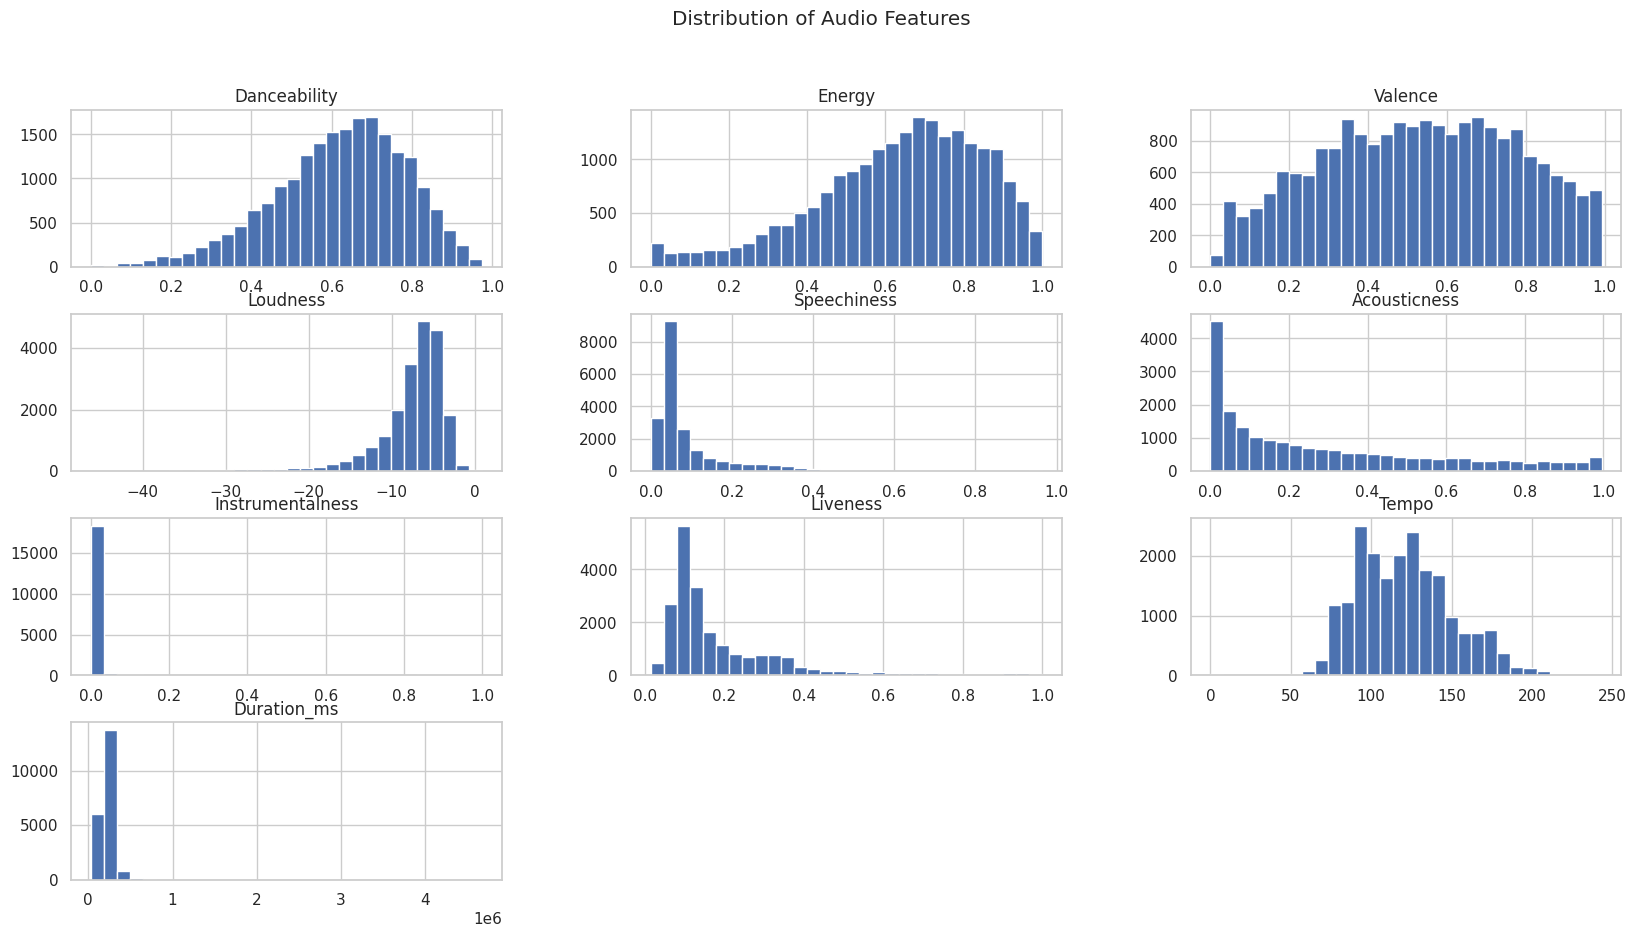

In [14]:
audio_features = ['Danceability', 'Energy', 'Valence', 'Loudness', 'Speechiness',
                  'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo', 'Duration_ms']
df_clean[audio_features].hist(bins=30, figsize=(20,10))
plt.suptitle('Distribution of Audio Features')
plt.show()

#### Conclusion
Most tracks exhibit high danceability and energy, with instrumentalness skewed toward low values, indicating the dataset primarily consists of vocal-heavy songs.

## 4. Feature Correlations
- Heatmap showing correlation between audio features.

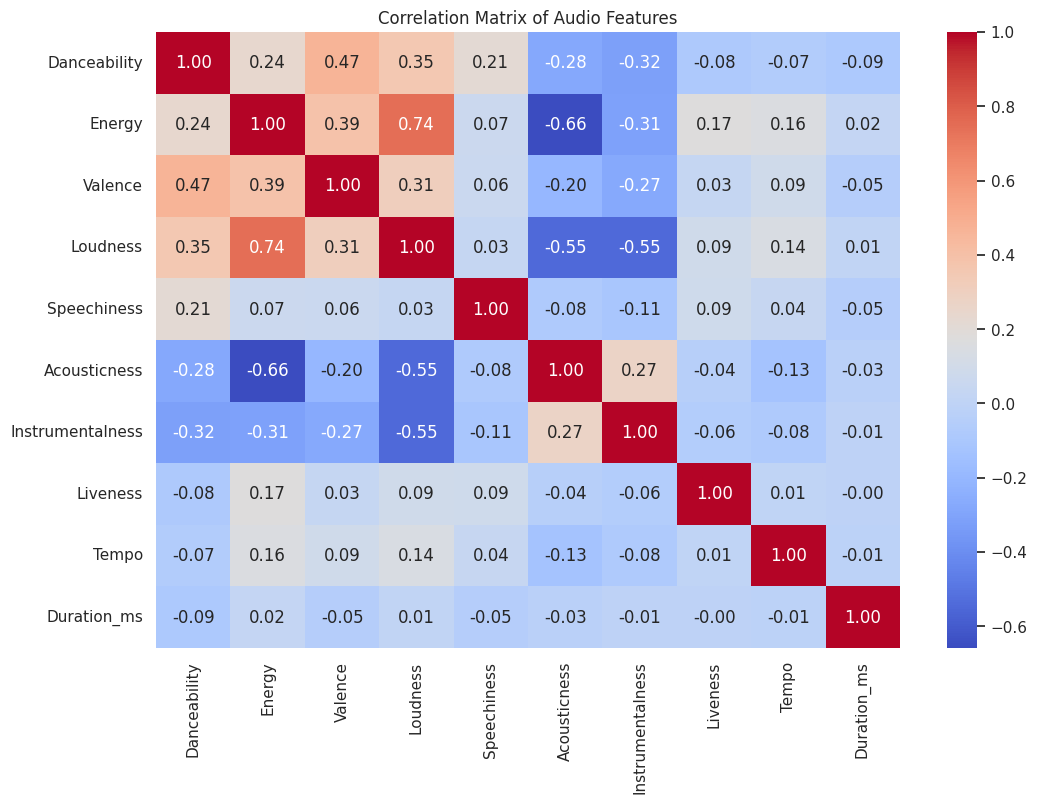

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean[audio_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.show()

#### Conclusion
Energy strongly correlates with danceability and loudness, while acousticness negatively correlates with energy, reflecting expected acoustic vs electronic track dynamics.

## 5. Artist-Level Analysis
- Identify top artists by mean energy.

In [16]:
artist_stats = df_clean.groupby('Artist')['Energy'].mean().sort_values(ascending=False).head(10)
print("Top 10 Energetic Artists:\n", artist_stats)

Top 10 Energetic Artists:
 Artist
Rain Fruits Sounds         0.9781
Lamb of God                0.9750
Killswitch Engage          0.9705
Slayer                     0.9688
Kordhell                   0.9661
Scooter                    0.9580
The Prodigy                0.9497
Shilpi Raj                 0.9476
Five Finger Death Punch    0.9397
Motionless In White        0.9370
Name: Energy, dtype: float64


#### Conclusion
Several artists consistently produce high-energy tracks, which may appeal more to certain listener groups.

## 6. Track-Level Analysis
- Tracks with highest valence (positivity/mood).

In [17]:
track_valence = df_clean.groupby('Track')['Valence'].mean().sort_values(ascending=False).head(10)
print("Top 10 Most Positive (Valence) Tracks:\n", track_valence)

Top 10 Most Positive (Valence) Tracks:
 Track
Spider Dance                    0.993
El Tucanazo                     0.991
Feliz Feliz                     0.990
La Recia                        0.989
Long Drives                     0.986
Al gato y al ratón              0.985
What a Fool Believes            0.985
Sergio el Bailador              0.984
She Works Hard For The Money    0.984
Quién Se Anima                  0.982
Name: Valence, dtype: float64


#### Conclusion
High valence tracks can help identify music associated with positive moods, useful for playlist curation or recommendation systems.

## 7. Popularity Insights Using YouTube Views
- Compare distributions of features between all tracks and top 10% popular by views.

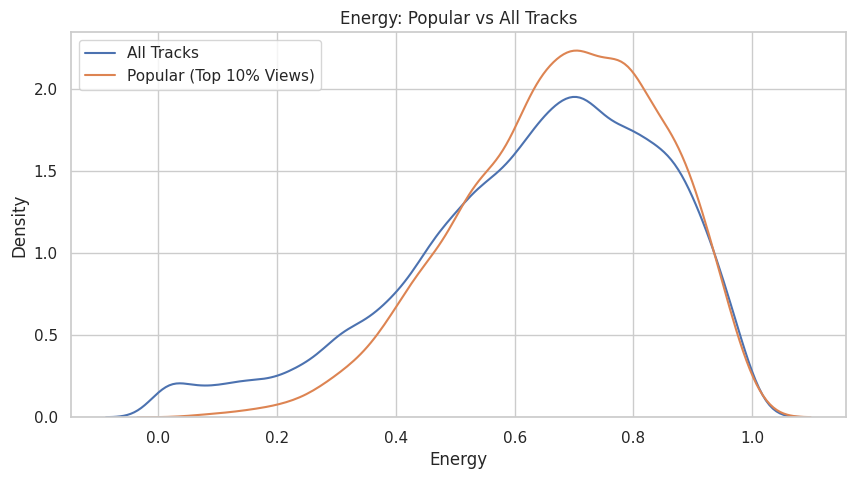

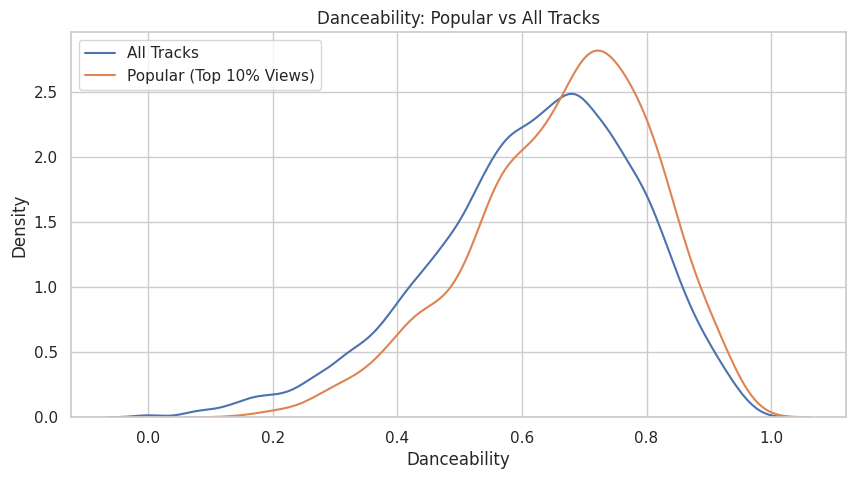

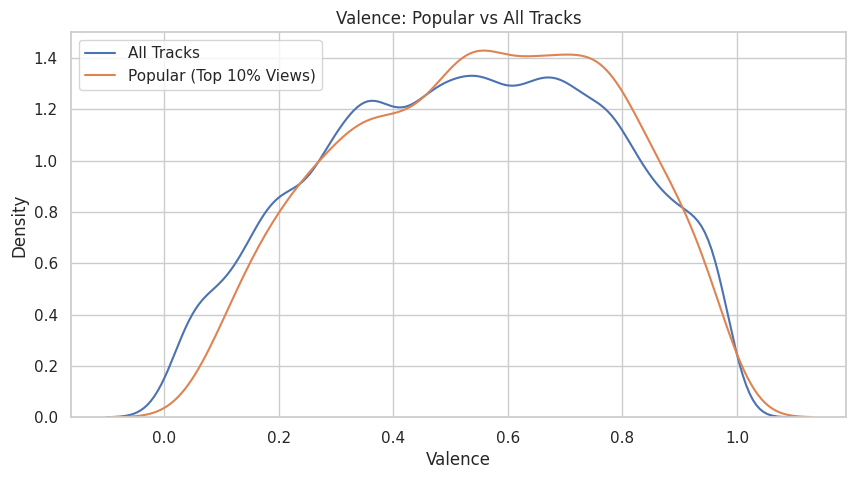

In [18]:
pop_thresh = df_clean['Views'].quantile(0.9)
popular = df_clean[df_clean['Views'] >= pop_thresh]

for feat in ['Energy', 'Danceability', 'Valence']:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df_clean[feat], label='All Tracks')
    sns.kdeplot(popular[feat], label='Popular (Top 10% Views)')
    plt.title(f'{feat}: Popular vs All Tracks')
    plt.legend()
    plt.show()

#### Conclusion
Popular tracks tend to cluster at higher energy and danceability levels, indicating these features may drive listener engagement.

## 8. Instrumentalness vs Acousticness
- Scatterplot to check relationship.

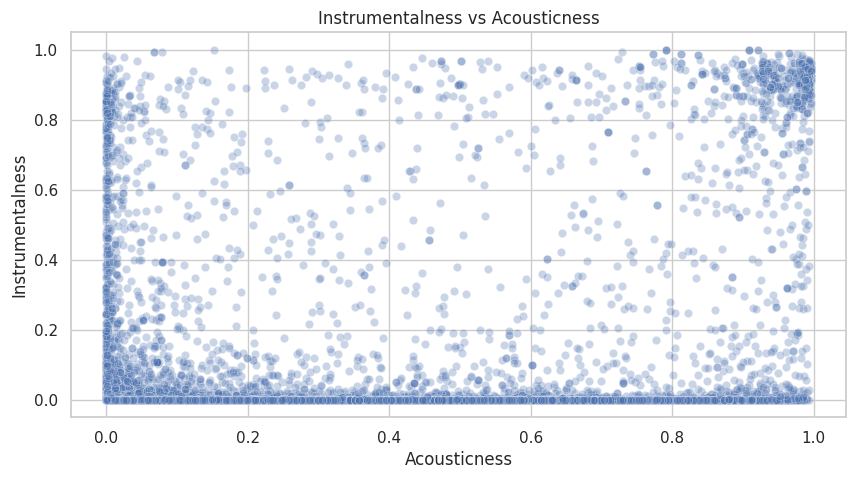

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Acousticness', y='Instrumentalness', data=df_clean, alpha=0.3)
plt.title('Instrumentalness vs Acousticness')
plt.show()

#### Conclusion
There is a visible positive relationship; highly instrumental tracks tend to be more acoustic, characterizing likely classical or unplugged styles.

## 9. Track Duration vs Tempo
- Explore correlation by scatterplot.

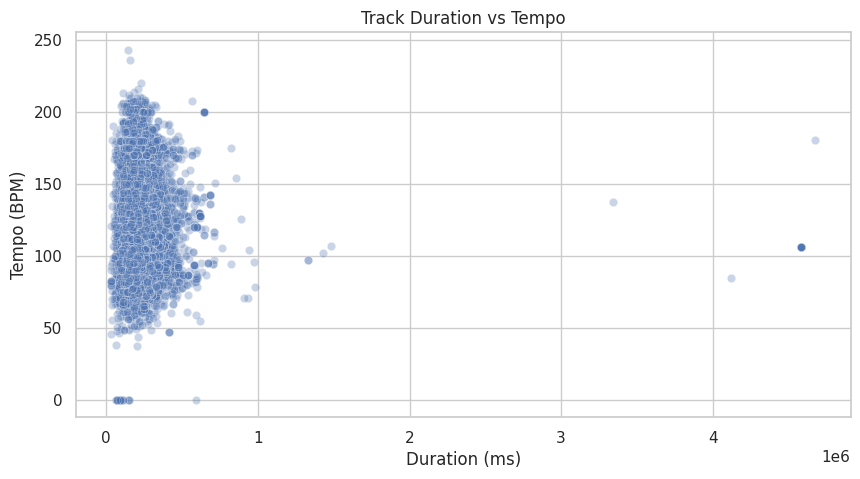

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Duration_ms', y='Tempo', data=df_clean, alpha=0.3)
plt.title('Track Duration vs Tempo')
plt.xlabel('Duration (ms)')
plt.ylabel('Tempo (BPM)')
plt.show()

#### Conclusion
No strong correlation appears, but clusters indicate typical pop song durations and tempos.

## 10. Metadata Exploration
- Album types and unique counts.

In [21]:
print("Album types count:\n", df_clean['Album_type'].value_counts())
print("Unique tracks:", df_clean['Track'].nunique())
print("Unique artists:", df_clean['Artist'].nunique())

Album types count:
 Album_type
album          14924
single          5004
compilation      788
Name: count, dtype: int64
Unique tracks: 17839
Unique artists: 2079


#### Conclusion
Dataset shows rich diversity in albums and artists, indicating broad coverage for analysis.

## 11. Overall Conclusion
This exploratory analysis highlights strong links between audio features such as energy, danceability, and track popularity. The dataset's diversity provides a rich base for music recommendation and trend analysis, although absent year and genre information limits temporal and categorical trend insights. Future work could enrich the dataset with release dates and genres to deepen understanding.